# Final Assignment RO47002 - Machine Learning for Robotics 2021/2022

Before you start, fill in the cell below your lab group's number and the names of both lab partners.
It is also suggested that you carefully read through all provided content before you start adding things.

*Note*: as always, basic plagiarism and ethical guidelines apply:
* By submitting this notebook, **you both claim that the solution is yours and yours only.**
* You are not allowed to share your work with others.
* Even after the deadline has passed, do *not* share or upload your solution anywhere (e.g. do not put it on github).

In [1]:
GROUP_NUMBER = "9"
STUDENT_NAME1 = "Buriani, Gioele"
STUDENT_NUMBER1 = "5629888"
STUDENT_NAME2 = "Panichi, Edoardo"
STUDENT_NUMBER2 = "5630444"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

---

## Introduction
We are in the year 2121. The newest sport sensation is solar robot racing. Similar to Formula 1, the races are held on different tracks, however times have changed and those are no longer in different countries but on different planets. The Earth track is well-known for its lush green surroundings, the Mars track for its bright red environment, the Saturn track is instantly recognizable for the brownish soil, and a new race track is currently being built on Neptune, promising a soothing blue background.

Like in good old fashioned car racing, no modifications of the car are allowed between races, and in particular the AI cannot be changed. That means we need to develop one single machine learning model that is able to drive on all planets. From past competitions we have data from Earth, Mars, and Saturn (i.e., the 3 datasets provided) but we do not have any data from Neptune yet (i.e., this is a hidden test set), making this season extra challenging. However, we have the possibility to collect more data on 3 planets and can also use test tracks on planets not participating in the competition (i.e., the provided code that allows to collect more data and to change some properties of the environment).

As you are just starting out as a solar robot racing AI engineer, you first get the familiarization assignment to train a model solely for Earth before moving on to designing a competition-grade AI.

## Robot car AI

In this competition, the robot car's actions need to be determined based on only the robot car's last observation (i.e. sensor measurements). More technically: the goal is to create a function $f(observation) \rightarrow action$, which the robot can continuously apply in a loop on its sensor measurements to determine its next action. This type of function is often called a *policy*.

In this assignment, the input and output of the policy function $f$ are defined as:
- the input `observation` will be an RGB image (a numpy array) containing a top-down view of the robot's surroundings, including the road ahead.
- the output `action` should be an integer out of one of the possible actions (an integer between 0 and 4):
    0. Do nothing
    1. Accelerate
    2. Turn steer left
    3. Turn steer right
    4. Brake

More details will be provided later in the section "0. Code to get you started" below.

Note that the policy function will completely determine the behavior of the robot.
You can think of the robot executing the policy in a never-ending loop (in pseudo-code):
```python
# Pseudo robot main loop with policy f
while True:
    observation = read_sensor_measurement()
    action = f(observation) # apply the policy
    execute_action(action)
```
In fact, the behavior is already implemented for you in a **simulator**. This means you can test a policy function $f$ by plugging it in the simulator and seeing how your robot car behaves!
The simulator also allows us to quantify how well your robot behaved by returning a 'reward' value for each simulation step (a higher reward is better). More details on the rewards will be explained below in Section 0.

## Task description: imitation learning

These type of tasks, where a robot's policy needs to be optimized to achieve a high expected reward for operating in some environment, is often addressed through *reinforcement learning*. However, in this assigment we will *not* use reinforcement learning techniques, but mainly treat the problem as a **supervised classification task**.
The training input (observations) and output (action labels) data will be obtained through demonstrations of humans *manually* controlling the robot car. By training your machine learning models on these demonstrations, you will create an AI which "imitates" how a human would drive. This type of supervised machine learning is therefore called *imitation learning*.

There are some coding challenges and design choices that you have to solve to use human driving demonstrations as labeled data to create your machine learning models. As before, you will have to think about feature extraction, hyperparemeter optimization, evaluation metrics, comparing models, etc.

Once you have trained a classification model, you could define a new policy function which uses your trained model, and test this policy in the simulator. Does your most succesful model also accumulate the most reward in the simulation? Can you make an AI which succesfully drives on known and unknown planets?

## Deliverables
The deadline is **Sunday October 24th, 2021 at 23:59**. Late submission is –1 grade point per day.

* The main deliverable is this Jupyter Notebook, integrating the report (markdown cells) and the code.
* Submission is again in the form of a single ZIP file that *includes your notebook, and all files required to run the notebook and reproduce the results*. This includes all used data/demonstrations (including the ones that were provided), any loadable parameter files, any auxiliary scripts, etc.
* Name the ZIP file "**GroupNumber_final_assignment.zip**", e.g., if you are in group 456, the name would be "456_final_assignment.zip".
* Unlike previous lab assignments, there are no autograded cells or asserts, but we will grade the notebook manually. Therefore, you are free to add cells as you see fit, as long as the required sections are still present in the notebook.
* Make sure that the notebook runs correctly. That is, clear all outputs, restart the kernel and run the notebook from top to bottom. 
* The notebook needs to be able to run within 20 minutes on a high-end PC, performing all steps (also including training, the only exception is hyperparameter optimization which can be commented out).
* In contrast to the practica, please submit the notebook *including* the output (i.e., do not clear the outputs before zipping it up). 


## Grading Criteria
Below you will find an outline of the sections that the notebook needs to contain and what we expect for each part. More specific requirements are listed there as well. The indicated number of points, out of a total of 100, should give you a rough indication of how much effort to put into each part.

In general, we will not focus as much on the performance of the method you design, but rather the _level of understanding and argumentation about your design choices_. So, we are not only interested in WHAT you did, but will put a strong emphasis on your reasoning about the WHY. Try to synthesize rather than describing what you did step by step.

### Quality of the report (20 points)
- Structure & Readability
 - Logical flow
 - Connection between parts
- Academic English
 - Do not use short forms, like "isn't", "wouldn't".
 - Do not use colloquial style, like "a couple of".
 - Spell check and proofread your report.
- Level of detail
 - Strive for elegant, concise text - longer reports do not necessarily yield higher grades.
 - There is no need to re-explain theory. Assume that the target audience of the report has followed the course.
- Figures & Tables
 - Choose figures/plots/tables carefully. Only include those that add to the story of the report. Do not put the burden on the reviewer to figure out which results you basing your conclusions on, but specifically refer (parts of) the specific table/plot/figure when needed.
 - When comparing two or more signals display them in one plot. Explain the colors / line types. The scale of the plots must be carefully chosen in order to clearly convey the information intended. Label the axes in graphs properly (variables and units).
- Citations
 - If you use images, theory and methods beyond what was covered in the course, etc., always reference sources.


### Your implementations and answers (80 points)

The remainder of this notebook follows the following structure:

0. Code to get you starte (0 points, *nothing for you to do here*)
1. Explore & Inspect the Data (5 points)
2. Prepare the Data and Evaluate Features (15 points)
3. Single Planet Action Classification  (35 points)
4. Enabling Generalization (20 points)

Apart from section 0, you will have to implement and answer questions for all of the other 4 sections to earn points. *For each of these 4 sections, we have various questions or implementation tasks that your submission should address. These are listed in the cells at the end of this notebook.*

Note that there is not one best answer to these questions, and the task could be addressed in different ways. We want to know *your* motivation for *your* selected approach.

---

# 0. Code to get you started

Note, you will not have to implement anything in this section, but you are free to play around with what is provided here, or copy parts to new cells in your solutions.

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import cv2 # you are allowed to use functions from cv2
import glob

# import the simualtion environment
import car_racing_ro47002 as cr

First, we explore the available planets. The code below generates an image from the 3 planets. You do not need to understand how this code works, but it should help you understand the context of what we are doing.
Note that the images also include your robot car, and the road ahead.

In [4]:
import ipywidgets
from IPython.display import display

# Show screenshot of a sampled environment
def plot_planet_example(planet_id):
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(10)
    env.reset()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(f'Planet {planet_id}')
    env.close()

ipywidgets.interactive(plot_planet_example, planet_id=(0,2))

interactive(children=(IntSlider(value=1, description='planet_id', max=2), Output()), _dom_classes=('widget-int…

## Loading pre-recorded human demonstrations

You are provided several pre-recorded demonstrations of a human *manually controlling* the robot car on several tracks on several planets.
**You can use this data to train a classifier that you can use to implement one or more better policies, which should (ideally) perform similar to how a human would control the robot car.**

Each provided demonstration ...
* ... contains a sequence of 1000 (observation, action) pairs ...
* ... recorded at a specic planet and track, ...
* ... for convenience, also contains (1000 dimensional) arrays containing the fixed planet's and track's id of these input/output pair.

A demonstration is stored as a python pickle file.
The code below shows how to load the saved demonstrations, and to do some simple pre-processing.

In [5]:
# Look for all the demonstration pickle files in the demonstrations/ directory.
#  The originally provided demo files are called: demo-[planet_id]-[track_id]-[datetime].pickle
#  Any demo files you record yourself are called: demostud-[planet_id]-[track_id]-[datetime].pickle

# CHANGE THIS IF NEEDED: select the pickle file pattern to match ...

#DEMO_FILEPATTERN = 'demo-*-*.pickle'      # only use ORIGINALLY provided demo files
#DEMO_FILEPATTERN = 'demostud-*-*.pickle'  # only use YOUR own collected demo files
DEMO_FILEPATTERN = 'demo*-*.pickle'       # use ALL available demo files

# find the relevant filenames
filenames = glob.glob(f'demonstrations/{DEMO_FILEPATTERN}')
filenames.sort() # ensure the order is well-defined
print(f'Found {len(filenames)} demonstrations')

# in a loop, load the found pickle files
demonstrations = []
for filename in filenames:
    with open(filename, 'rb') as fd:
        demonstration = pickle.load(fd)
        
        actions = demonstration['actions']
        print(f'Loaded {actions.shape[0]} samples from {filename} ...')
        
        demonstrations.append(demonstration)

Found 14 demonstrations
Loaded 1000 samples from demonstrations\demo-0-0-20211012_155840.pickle ...
Loaded 1000 samples from demonstrations\demo-0-1-20211012_160607.pickle ...
Loaded 1000 samples from demonstrations\demo-0-2-20211012_161107.pickle ...
Loaded 1000 samples from demonstrations\demo-0-3-20211012_161203.pickle ...
Loaded 1000 samples from demonstrations\demo-0-4-20211012_161237.pickle ...
Loaded 1000 samples from demonstrations\demo-0-5-20211012_161457.pickle ...
Loaded 1000 samples from demonstrations\demo-0-6-20211012_161843.pickle ...
Loaded 1000 samples from demonstrations\demo-0-7-20211012_161923.pickle ...
Loaded 1000 samples from demonstrations\demo-0-8-20211012_162117.pickle ...
Loaded 1000 samples from demonstrations\demo-0-9-20211012_162157.pickle ...
Loaded 1000 samples from demonstrations\demo-1-10-20211012_170226.pickle ...
Loaded 1000 samples from demonstrations\demo-1-11-20211012_171117.pickle ...
Loaded 1000 samples from demonstrations\demo-2-12-20211012_171

In [6]:
# we can combine all the observations, actions, planet and track ids
observations = np.concatenate([d['observations'] for d in demonstrations])
actions = np.concatenate([d['actions'] for d in demonstrations])
planet_ids = np.concatenate([d['planets'] for d in demonstrations])
track_ids = np.concatenate([d['tracks'] for d in demonstrations])

# pre-processing: subsample and only keep every n-th sample for efficiency
# this can speed up training
ss = 10
observations = observations[::ss]
actions = actions[::ss]
planet_ids = planet_ids[::ss]
track_ids = track_ids[::ss]

## Understanding the data

We here take a closer look at format of the demonstration data. The observations (input) are RGB images. The actions (target class labels) are integers.

In [7]:
# count the total number of observations
N = observations.shape[0]

print(f'The data consists of {N} (observation, action) pairs:')
print(f'- observations : a {observations.shape} numpy int8 array, i-th entry contains RGB image of sample i')
print(f'- actions      : a {actions.shape} numpy int array, i-th entry contains action (class) label of sample i')
print(f'- planet_ids   : a {planet_ids.shape} numpy int array, i-th entry contains the planet_id of sample i')
print(f'- track_ids    : a {track_ids.shape} numpy int array, i-th entry contains the track_id of sample i')

The data consists of 1400 (observation, action) pairs:
- observations : a (1400, 96, 96, 3) numpy int8 array, i-th entry contains RGB image of sample i
- actions      : a (1400,) numpy int array, i-th entry contains action (class) label of sample i
- planet_ids   : a (1400,) numpy int array, i-th entry contains the planet_id of sample i
- track_ids    : a (1400,) numpy int array, i-th entry contains the track_id of sample i


We can inspect inspect a single sample in the recorded data:

Action of sample 0:                     1
Planet id where sample 0 was recorded:  0
Track id where sample 0 was recorded:   0


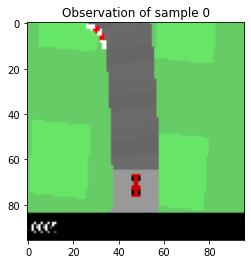

In [8]:
idx = 0 # sample index, should be in range [0, N-1]

print(f'Action of sample {idx}:                    ', actions[idx])
print(f'Planet id where sample {idx} was recorded: ', planet_ids[idx])
print(f'Track id where sample {idx} was recorded:  ', track_ids[idx])

plt.imshow(observations[idx])
plt.title(f'Observation of sample {idx}');

Note that the observation is just a low-resolution image of the simulated environment.

An action (label) is simply an integer. The five possible action values are:

In [9]:
ACTION_NOOP = 0  # NO-OPeration, i.e. do not steer, accelerate or brake
ACTION_ACCEL = 1 # Accelerate
ACTION_LEFT = 2  # Steer left
ACTION_RIGHT = 3 # Steer right
ACTION_BRAKE = 4 # Brake, deaccelerate

You can use the demonstration data to train and validate your machine learning methods.
Of course, you would first need to define some feature extraction procedure(s) to convert the observations into some suitable feature vectors for your machine learning techniques.

## Testing your model in  the simulator


At some point, *after you have trained and evaluated your classifier*, you might want to check how well your classification method can actually control the robot car. For this, you will need to wrap your trained classifier into a policy function that the simulator can use.

This section will go over the details of
* how to start the simulator;
* how to implement a policy $f$;
* how to analyse the rewards.


### Running a simulation

The function `run_simulation` below will setup a simulation of your robot on a given planet (`planet_id`) and track (`track_id`), and will use the policy `f` you provide to control the robot, for a maximum of `iterations` simulation steps. The simulation function can also show you the simulation in a popup-window (set `render=True`), or record all the (observation, actions) pairs (`record_data=True`).

The function signature of run_simulation is:
```
rewards = run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0)
    Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation 
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
```


In [10]:
# user key input handler
from pyglet.window import key
import time

# keep track if which keys have been pressed in the popup window
# (will be used later for the human driver)
KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}

def key_press(k, mod):
    global STOP_SIMULATION, KEY_PRESSED
    if k==key.ESCAPE: STOP_SIMULATION = True # set 'quit' flag if ESCAPE key is pressed
    KEY_PRESSED[k] = True

def key_release(k, mod):
    global KEY_PRESSED
    KEY_PRESSED[k] = False

# define the set of all actions    
ACTIONS = [0, 1, 2, 3, 4]
ACTION_NAMES = ['noop', 'accel', 'left', 'right', 'brake']
NUM_ACTIONS = 5 # number of distinct actions

# A lookup table to convert the action class to an actual control input for the simulator (steer, accel, brake)
ACTIONS_TO_CONTROL_INPUT = np.array([
    [ 0,  0,  0   ], # 0 = do nothing
    [ 0,  1,  0   ], # 1 = accelerate
    [-1,  0,  0   ], # 2 = steer left
    [ 1,  0,  0   ], # 3 = steer right
    [ 0,  0,  0.25], # 4 = brake
])

def run_simulation(f, iterations=500, planet_id=0, track_id=0, verbose=False, render=False, record_data=False, delay=0.0):
    """ Run robot car simulation
    Input arguments:
    - f             # [function] the robot's policy function
    - record_data   # [True/False] if true, return all (observation, action) pairs from the simulation
    - planet_id     # [int] select the target planet (0=Earth, 1=Mars, 2=Saturn, 3=Neptune)
    - track_id      # [int] select the target track on that planet (0, 1, 2, etc.)
    - iterations    # [int] the maximum number of iterations N to run the simulation
    - render        # [True/False] show the scene in a popup window (can be a bit slower)
    - delay         # [float] a time delay that can be added to make the simulation run a bit slower
    
    Returns:
    - rewards       # [numpy array of floats] all N rewards accumulated during the simulation
    - observations  # [numpy array N x H x W x 3] N observations, each observation being a WxH 3-channel image
    - actions       # [numpy array of ints] all N actions outputted by the given policy f
    
    Note: `observations` and `actions` are only returned if record_data=True
    """
    
    print(f'Starting simulation for {iterations} iterations.')
    print('*** Press ESC key in popup window to stop the simulation! ***')
    print()

    # create a simulation environment on the given planet
    planet = cr.PLANETS[planet_id]
    env = cr.CarRacing(planet)
    env.seed(track_id+planet_id*1455312) # set environment track generation seed based on planet_id and track_id

    rewards = [] # will store the accumulated rewards
    observations = [] # will store the accumulated observations (only if record_data==True)
    actions = [] # will store the accumulated actions outputted by policy f (only if record_data==True)
    
    # reset KEY_PRESSED state at start of simulation
    global KEY_PRESSED
    KEY_PRESSED = {key.LEFT: False, key.RIGHT: False, key.UP: False, key.DOWN: False}
    
    # the STOP_SIMULATION flag will be set to True if user wants to interrupt the simulation
    global STOP_SIMULATION
    STOP_SIMULATION = False
    completed_iterations = 0
    
    try:
        # reset the simulation, and get the initial observation (robot "sensor measurement")
        observation = env.reset()
        
        # ensure we can listen to user input in the popup window (e.g. to quit when pressing ESCAPE)
        env.viewer.window.on_key_press = key_press
        env.viewer.window.on_key_release = key_release
        
        # main simulation loop
        for itr in range(iterations):
            time.sleep(delay)
            if STOP_SIMULATION: break
                
            # ** APPLYING YOUR POLICY **
            # execute the given policy on the observation to determine the robot's action
            action = f(observation)
            
            # sanity check: is the policy implemented correctly?
            assert (isinstance(action, (int, np.integer))) # returned action should be a builtin or numpy integer
            assert (action in ACTIONS) # action should be an integer 0, 1, 2, 3 or 4

            # hard coded that for the first few iterations, the robot will always accelerate,
            #   to avoid a poor policy from not moving the robot at all
            if itr < 4: action = 1 # action 1 is accelerate
            
            if verbose:
                print(f'iteration {itr}: action = {ACTION_NAMES[action]}')

            if record_data:
                # only store all the observation and action pairs during the simulation
                #   if the record_data argument is set to True
                observations.append(observation)
                actions.append(action)
            
            # ** EXECUTE ACTION ON ROBOT & GET OBSERVATION FOR NEXT TIME STEP **
            ctrl_input = ACTIONS_TO_CONTROL_INPUT[action] 

            # execute simulation step with the given control input
            observation, reward, environment_done, info = env.step(ctrl_input)
            completed_iterations += 1
            
            if verbose:
                print(f'iteration {itr}: reward = {reward}')

            if render:
                # update pop-window visualization
                env.render()

            # collect all rewards in a list
            rewards.append(reward)
    finally:
        # make sure we always close the pop-up window,
        # even if some exception is thrown during the main loop
        env.close()
        
    rewards = np.array(rewards)
    total_reward = np.sum(rewards)
    
    print(f'total reward after {completed_iterations} iterations: {total_reward}')
    print(f'average reward: {total_reward/completed_iterations}')
    
    if record_data:
        return rewards, np.array(observations), np.array(actions, dtype=int)
        
    # by default, only return the rewards

    return rewards

### Implementing a policy

For the simulator, a policy $f(observation) \rightarrow action$ should be implemented as a plain python function which takes a numpy array as input (the observation) and returns an integer (the action).
So generally, a policy implementation would look like this:

```python

def f(observation):    
    # Input: observation, a H x W x 3 numpy array containing an RGB image of the surroundings
    # Output: action,     an integer representing the action (0 = NOOP, ... 5 = Brake)
    # N.B.: actions is just an int, NOT a numpy array
    
    # YOUR CODE
    #   convert observation to feature vector
    #   predict action class given the feature vector using some ML technique
    
    return action
```
*Of course, don't name you policy just `f`, but give it some more descriptive name!*

To illustrate, here is a dummy policy which just picks a random actions (without actually looking at the observation).

In [11]:
# a dummy policy
def f_dummy(observation):
    """ Dummy policy function, which just returns random action. """
    
    # in this dummy policy, we ignore the observation and just select a random action
    action = np.random.randint(0, NUM_ACTIONS)
    
    print(f'Received observation: {observation.shape} numpy array of type {observation.dtype}, returning action {action}')
    return action

We can confirm that the policy returns a valid action label:

In [12]:
action = f_dummy(observations[0])

# returned action should be a builtin int or a numpy integer (NOT a numpy array) in the range [0, 4]
assert (isinstance(action, (int, np.integer)))
assert (action in ACTIONS) # ACTIONS is the set of possible action labels, [0,1,2,3,4]

Received observation: (96, 96, 3) numpy array of type uint8, returning action 1


### Reward

To quantify how well a policy is working, the simulator will return the *rewards* that the robot car collected at each simulation step. The rewards determine how well you are doing in a race, and are based on the number of  segments of the track that the robot racer passes:

* Everytime a new segments of the track is touched by your robot car, your robot receives a positive reward. You can see this in the visualization when a road segments's color changes to a lighter gray.
* The robot car also get a tiny *negative* reward in each time step, as a penalty for spending time.
* When the robot car goes off the track, it will not touch any new track segments and thus only collects negative rewards, but also the friction changes which makes the robot car more difficult to control.

Overall, the goal is to cover as much of the race track as possible in the given number of simulation iterations. So, your robot car should go as fast as possible while staying on the track!

### Illustration of running the simulator with the dummy policy

Let's try to run the simulation with the dummy policy, and render the output in the popup-window for the default number of iterations.

In [13]:
# running the simulation with the dummy policy
rs = run_simulation(f_dummy, render=1, planet_id=0, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 0
Received observation: (96, 96, 3) numpy array of type uint8, returning action 2
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 1
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of type uint8, returning action 3
Received observation: (96, 96, 3) numpy array of type uint8, returning action 4
Received observation: (96, 96, 3) numpy array of 

Clearly, this policy doesn't do anything particularly useful, and should make the robot car just slowly move forward. This policy will touch only few road segments, and therefore collect little positive reward.
Let's visulize the rewards that the robot collected during the simulation.

The first plot below shows when new parts of the track are reached and a large reward is collected. The second plot shows the total/cumulative reward.

Average reward: 0.08011527377521642


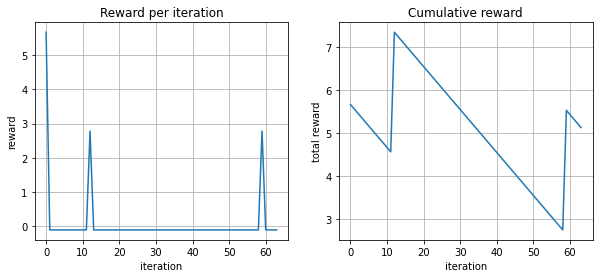

In [14]:
plt.figure(figsize=(10,4)) # create a wide figure (size 10) which is not so tall (size 4)
plt.subplot(1,2,1) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(rs)
plt.xlabel('iteration')
plt.ylabel('reward')
plt.title('Reward per iteration')
plt.grid()

plt.subplot(1,2,2) # create subplot of 1 row, 2 columns, enable plotting in first cell
plt.plot(np.cumsum(rs)) # Cumulative sum of rewards
plt.xlabel('iteration')
plt.ylabel('total reward')
plt.title('Cumulative reward')
plt.grid()


print('Average reward:', np.mean(rs))

For comparing and evaluating classifiers, measure the performance of the classifiers themselves, i.e., the macro-F1 score.

Still, the simulation and rewards can help you assess in what situations your robot AI is performing well, and when it is failing.

# Collecting new demonstrations

At some point, you might want to collect more human demonstration data to make your method even beter.
You can do this by:

- manually controlling the robot car in the simulation yourself to generate new demonstrations
- recording the resulting (observation, action) pairs during these demonstrations
- saving the good demonstrations to disk to increase your example dataset

The code below demonstrates how to do this. The idea is simple: just use the regular `run_simulation()` function, but use a special `f_human()` policy which simply returns the action based on the keyboard input!

In [15]:
# a human driver
def f_human(observation):
    # Get the action obtained by the key_press/key_release callbacks from the popup window.
    # Note that the human driver (you!) will of course see the environment image in the popup window,
    # and ignore the 'observation' input of this function.
    # This 'human policy' will therefore return your 'action' response to the visual input by checking
    # which keyboard arrows you pressed.
    
    global KEY_PRESSED
    
    action = ACTION_NOOP
    if KEY_PRESSED[key.LEFT]: action = ACTION_LEFT
    elif KEY_PRESSED[key.RIGHT]: action = ACTION_RIGHT
    elif KEY_PRESSED[key.UP]: action = ACTION_ACCEL
    elif KEY_PRESSED[key.DOWN]: action = ACTION_BRAKE
    
    return action

When we use this policy, ensure that the simulator stores and return all the (observation, action) pairs by setting the `record_data` argument of run_simulation to `True`.
You can adjust the `planet_id` and `track_id` to get human driving responses on a variety of tracks in your training planet environments.

In [16]:
planet_id=0 # <-- CHANGE THIS to select the planet; can be 0, 1, 2
track_id=0  # <-- CHANGE THIS to select the track; can be any positive integer

rs, rec_obs, rec_actions = run_simulation(
    f_human,               # by using the 'human' policy, YOU determine the robot's actions based on what you see
    record_data=True,      # record and return all (observation, action) pairs from the simulation 
    planet_id=planet_id,   # select the target planet
    track_id=track_id,     # select the target track on that planet (0, 1, 2, etc.)
    iterations=1000,       # maximum number of iterations to run the simulation
    render=True,           # when controling the car manually, it makes sense to render the scene
    delay=0.01             # adding a small delay will help you control the robot car
)
# Note: with delay=0.01 the simulation runs a bit slower, which makes it easier to give demonstrations

Starting simulation for 1000 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 55 iterations: 6.027377521613852
average reward: 0.10958868221116094


Explore the just collected samples in your latest recoding using an interactive slider

In [17]:
def plot_sample(idx, observations, actions):
    observation = observations[idx]
    action = actions[idx]
    plt.clf()
    plt.imshow(observation)
    plt.title(f'{idx}: {action}');
    
ipywidgets.interactive(lambda idx: plot_sample(idx, rec_obs, rec_actions), idx=(0,rec_obs.shape[0]-1))

interactive(children=(IntSlider(value=27, description='idx', max=54), Output()), _dom_classes=('widget-interac…

If you are unhappy with the the demonstration you gave, you can just execute the `run_simulation()` cell above again, until you are satisfied.

To save the demonstration to disk, execute the cell below after setting `SAVE_DEMO` to True.

**After you have saved the demonstration, don't forget to aftewards IMMEDIATELY set `SAVE_DEMO` back to False to avoid accidentally saving new demonstrations every time you rerun the notebook!!!**

Note that the pickle filenames of your recordings will start with `demostud-`, while the originally provided demonstrations start with `demo-`. This makes it easy to load only the original, your, or both types of recordings.

In [18]:
SAVE_DEMO = False # <-- CHANGE THIS to 'True' to SAVE the last recording to disk!

if SAVE_DEMO: 
    rec_N = rec_obs.shape[0]

    demonstration = {
        'observations': rec_obs,
        'actions': rec_actions,
        'planets': planet_id * np.ones(rec_N, dtype=int),
        'tracks': track_id * np.ones(rec_N, dtype=int),
    }
    
    # include date+time to filename in YYYYMMDD_HHMMSS format
    import datetime
    now = datetime.datetime.now()
    dt_str = now.strftime('%Y%m%d_%H%M%S')

    # Save to disk
    save_filename = f'demonstrations/demostud-{planet_id}-{track_id}-{dt_str}.pickle'
    print(f'Saving demonstation of planet {planet_id}, track {track_id} to {save_filename} ...')
    with open(save_filename, 'wb') as fd:
        pickle.dump(demonstration, fd)

Ok, that completes the example code.
Now it is your turn! Implement your solution to the final assignment below. For full points, make sure you address *all* the numbered items for each section, either by implementing something in code cells, or by providing text in Markdown cells. You are free to add as many code and markdown cells as required. Be sure to first read through all sections before you start, so you know what should go where. We are *not* using nbgrader for this final assignment.

**When you are done, double check the "Deliverables" section at the start of this notebook on how to prepare your final submission!**

Good luck!


---

# 1. Explore & Inspect the Data (5 points)
Add code and markdown cells to address all of the following points:

1. Create a visualization that shows three samples from each planet for which you have demonstrations
2. Explain in words what you observe: how do the observations from the planets vary?
3. Are the samples i.i.d.? What does that imply for splitting your data?
4. Is there a class imbalance? If yes, what are procedures to deal with that?
5. Do we have a high risk of conflicting labels for observations? What problems can this cause?
6. The data was collected from human demonstrations. What are potential issues with this way of collecting data?

 


## 1.1 Sample visualization
First of all, we want to create a visualization of three samples from each planet for which we have demonstrations.

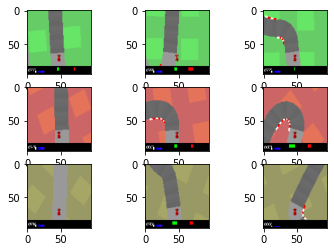

In [19]:
# First we divide the observations, actions and track_ids in three groups depending on the planet
obs_p0 = observations[planet_ids == 0]
obs_p1 = observations[planet_ids == 1]
obs_p2 = observations[planet_ids == 2]

# Then take three random samples from each planet and print the visualization
import random
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()
ax[0].imshow(obs_p0[random.randrange(0, 999)])
ax[1].imshow(obs_p0[random.randrange(0, 999)])
ax[2].imshow(obs_p0[random.randrange(0, 999)])
ax[3].imshow(obs_p1[random.randrange(0, 199)])
ax[4].imshow(obs_p1[random.randrange(0, 199)])
ax[5].imshow(obs_p1[random.randrange(0, 199)])
ax[6].imshow(obs_p2[random.randrange(0, 199)])
ax[7].imshow(obs_p2[random.randrange(0, 199)])
ax[8].imshow(obs_p2[random.randrange(0, 199)])

## 1.2 Observations
The biggest difference that can be noticed by simply observing the data is the color of the part external to the track. In particular, Earth is green, Mars is red and Saturn is brownish. Apart from this, the street itself is not different in terms of color or structure among different planets.
This color difference can be useful to immediately recognize circuits on different planets (we will see use this characteristic for clustering), but is not related to our final task of understanding the actions to do based on the track structure.

## 1.3 Are data i.i.d?
From the above images (randomly picked from the sample) seems that there is no correlation among the samples. But if we consider three consecutive samples of the same planet and the same track then it is clear that the samples are strongly correlated. This happens because the pictures are consecutive images of a track. In the following plots, it is clear the dependence among the samples.
To avoid problems while training any ML algorithms non i.i.d data it is important to shuffle the data before splitting them.

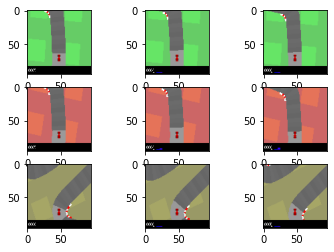

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()
ax[0].imshow(obs_p0[0])
ax[1].imshow(obs_p0[1])
ax[2].imshow(obs_p0[2])
ax[3].imshow(obs_p1[0])
ax[4].imshow(obs_p1[1])
ax[5].imshow(obs_p1[2])
ax[6].imshow(obs_p2[0])
ax[7].imshow(obs_p2[1])
ax[8].imshow(obs_p2[2])

## 1.4 Class imbalance
To verify if there is a class imbalance we analyze the class labels (actions) array.

In [21]:
unique, counts = np.unique(actions, return_counts = True)
dict(zip(unique, counts))

{0: 681, 1: 276, 2: 271, 3: 172}

As can be seen from the previous dictionary, there is quite a high-class imbalance, with class 0 (Do nothing) being by far the most present. Classes 1, 2 and 3 (Accelerate, Turn steer left, Turn steer right respectively) are more or less balanced, with turn left being more present than turn right because of a probable greater number of circuits where cars run anticlockwise. Finally, class 4 (Brake) is not present at all in the whole dataset.
A way to deal with this skewed dataset is surely by not using accuracy as the main performance score, but instead using confusion matrix or, even better, F1 score (harmonic mean of precision and recall). In this way, it is easier to understand if the system has a high accuracy just because it always assumes to do nothing (class 0) or if it actually performs well.

## 1.5 Conflicting labels
Yes, the probability of having conflicting labels for such a situation can be considered high. Indeed two are the reasonable scenarios that can lead to conflicting labels.

First: a pilot error that takes the wrong action for a certain situation (e.g. he decides to turn during a starting straight). Second: in the same situation two different pilots (so two different simulations) take different actions (e.g. sharp or wide trajectory for a turn).

The first problem generates outliers, then we need to keep it in mind to avoid overfitting with complex algorithms. The second generates an overlap on the dataset. Indeed samples with the same feature values (or very similar) will have different labels, leading to a dataset difficult to be divided by class.


## 1.6 Human collected data
Collecting the data from human demonstrations and trying to emulate those performances (Imitation learning) is a powerful yet risky approach.
The first main problem is that data acquisition requires human effort, and more data means more human time needed, which is expensive.
The second problem is that human error is introduced. As stated in point 1.5 on a straightway there is the possibility a human would maybe briefly lose control of the car and curve a little bit. Even if this may not represent a problem in real life because the pilot may be able to immediately regain control of the car, the machine learning algorithm risks of learning that on a straightway it has to curve. Human error can therefore cause outliers in the data as explained before.

---

# 2. Prepare the Data and Evaluate Features (15 points)

In this section you should pre-process the data, e.g., down-sample, and extract features to create your training data matrix "X".


## 2.1. Clustering observations from planets

Before we turn towards the main task of action classification (section 2.2), let us first try a small unsupervised clustering task. Pretend that we only have the observations, but did not record the planet_ids of these observations. The goal is to cluster the observations into k=3 clusters such that 1 cluster (approximately) corresponds to 1 planet. For this task, you can ignore the actions and track_id information.

1. Propose a feature extraction method `feat_extract_clust` which can be used to CLUSTER the samples and (approximately) recover the planet_ids. Motivate what you use in your feature extraction method.
2. Perform clustering based on the features obtained with `feat_extract_clust`, and compare the results to the true planet_id labels. For this you will need to select a statistical measure to compare cluster labels to planet_ids.
3. Explain what measure you use for comparing the features and why.
4. Can you recuperate the planet_ids by clustering? Motivate your answer with your results.

### 2.1.1 Feature extraction method
The feature extraction method most convenient for this problem is the one hinted in section 1.2. By a human observer, the first feature that comes to mind when having to determine the planet where a track belongs is color. In particular, the predominant color of the image will most probably determine what planet the image belongs to.

In order to apply this concept to the computer, the solution is making use of the RGB characteristic of each sample. In particular by making the mean of the RGB values of the 96x96 pixels of each image we would get the predominant color for each sample.

The shape of the array now is: (1400, 3)


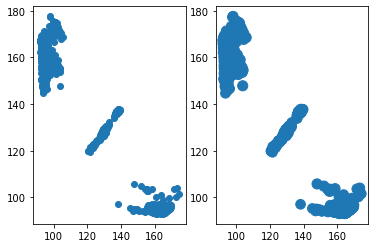

In [22]:
def feat_extract_clust(observations):
    RGB_observations = observations.mean(axis=1).mean(axis=1)
    return RGB_observations
    
RGB_observations = feat_extract_clust(observations)
print("The shape of the array now is:", RGB_observations.shape)

plt.subplot(1, 2, 1)
plt.scatter(RGB_observations[:,0], RGB_observations[:,1])
plt.subplot(1, 2, 2)
plt.scatter(RGB_observations[:,0], RGB_observations[:,1], RGB_observations[:,2])

As can be seen by the plots, using this feature extraction method, three distinct clusters are found.

Moreover, it is possible to see that the first plot (done only plotting the two features of R and G) is very similar to the second plot (done plotting all three R, G and B features). For this reason, it is safe to say that the B feature can be excluded from the process since R and G are sufficient to separate the three clusters. In this way, only two features are needed instead of three.

In [23]:
new_RGB_observations = RGB_observations[:, :2]
print("The new shape is:", new_RGB_observations.shape)

The new shape is: (1400, 2)


### 2.1.2 Clustering
Having now defined the dataset with only two features to which the clustering is going to be applied, it is time to choose the clustering algorithm.

By looking at the previous plot it is easy to see that the three clusters are easily separable. Therefore K-Means was chosen since it is a quite simple algorithm that works with hard margins (differently from the Gaussian Mixture Model) and performs well on easily separable data.

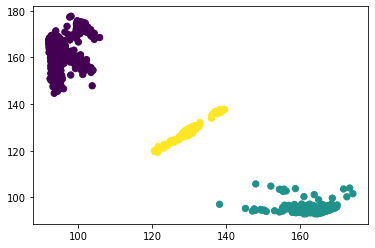

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(new_RGB_observations)
labels = kmeans.predict(new_RGB_observations)

plt.scatter(new_RGB_observations[:, 0], new_RGB_observations[:, 1], c=labels, s=40, cmap='viridis');

By looking at the plot is possible to see how the data has been clustered extremely well. In order to have a more precise idea, though, a statistical measure is needed to compare the K-Means labels to the actual planet_ids.

As a method, the sklearn.metrics.completeness_score() was selected.

In [25]:
import sklearn
from sklearn.metrics.cluster import completeness_score
score_km = sklearn.metrics.completeness_score(planet_ids, labels)
print ("The completeness score for this clustering is:", score_km)

The completeness score for this clustering is: 1.0


### 2.1.3 Adopted statistical measure
As a statistical measure, the sklearn.metrics.completeness_score() was selected. The reason is that is a simple algorithm based on a ground truth: the score is maximum if all the samples with the same label belong to the same cluster. This score is obtained by comparing the K-Means labels of all clusters with the actual labels of the data (planet_ids).

Also, since we don't know if the clustering algorithm would give the label 0 to Earth, label 1 to Mars and label 2 to Saturn, this measure is useful since it is independent of the absolute values of the labels.

Notice that this measure is truly significant because the result is very high (perfect in this case). Since the samples per label are very unbalanced (1000 for Earth, 200 for Mars and Saturn), if the result wasn't so high, even a bad algorithm that gives label 0 to all data would still achieve a score of about 0.7 in this case and therefore be considered good.

### 2.1.4 Can you recuperate the planet_ids with clustering?
Yes, since the completeness score is equal to 1 it is possible to have a perfect mapping of K-Means label into the planet_ids label.

The only problem may be the difference in the absolute value of the labels, but this is a pretty trivial problem since it can be solved easily by assigning the correct value to each K-Means label.

## 2.2. Features for action classification

Now we turn to feature exration for the main classification task, which you can reuse also in the later sections of this notebook.

1. Explain: Will you use the same extractor as in step 1; Why (not)?
2. Propose a feature extraction method `feat_extract` which you will use in the subsequent sections to classify *action*, rather than planet_ids.
3. Explain: Are there any important hyperparameters in your feature extractor?
4. Explain: How will you decide on the values for these hyperparameters? What is the trade-off if this hyperparameter is either (too) low or (too) high?
5. Explain: What is the dimensionality of your feature space?
6. Apply your `feat_extract` to all observations to create the data that you will use in the subsequent sections.

### 2.2.1 Can we use the same extractor?
No, since before we were interested in the RGB values for each sample in order to determine the planet_ids labels.
 
In this case, instead, we need to determine the actions labels, and therefore the RGB values of the samples alone are not useful for the task.

### 2.2.2 Feature extractor method
First of all, we need to extract the feature space from each sample.

In [26]:
obs_fs_list = []
for i in range(observations.shape[0]):
    fs = np.ndarray.flatten(observations[i])
    obs_fs_list.append(fs)

obs_fs = np.array(obs_fs_list)
print("The dataset shape now is: ", obs_fs.shape)

The dataset shape now is:  (1400, 27648)


Now we need to try some algorithms for the dimensionality reduction.

We try PCA trying to keep 90% variance and see the result.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
obs_reduced = pca.fit_transform(obs_fs)

print("The new shape of the dataset is:", obs_reduced.shape)

The new shape of the dataset is: (1400, 130)


The result is pretty impressive since we started from 27648 features per sample and managed to reduce it to 130. Therefore by losing only 10% of the total variance we managed to only have 0.47% of the initial features

Since we also have the labels an idea would be using LDA instead of PCA. However since LDA can only use a number of features smaller than the number of labels provided, this would result in a number of final features way too low (only 3).

We can therefore define the feat_extract function.

In [28]:
def feat_extract(obs_fs):
    pca = PCA(n_components = 0.90)
    obs_reduced = pca.fit_transform(obs_fs)
    return obs_reduced;

### 2.2.3 Important hyperparameters
Yes, there is an important hyperparameter: the variance. Actually two approaches are possible, the first one is to use as hyperparameter the number of features that we want to keep, the second (implemented in this case) is to define the final variance to preserve. The first approach is weaker in this case because requires the knownledge of the final amount of features (that actually is what we would like to calculate with the dimensionality reduction). Then, our choice was setting the desired preserved variance, and as consequence we retrieve the number of features necessary.

### 2.2.4 Values for the hyperparameters
The selection of the variance to preserve is definitely a crucial choice. A high value leads to an accurate preservation of the information stored in the dataset. On the other hand a low value allows us to store few features, obtaining a better dimensionality reduction.

With the value chosen in this case for the variance (90%), actually we obtained a nice compromise. Indeed, even if a high value of the variance is preserved, the remaining number of features is 0.47% of the initial number of features.

### 2.2.5 Dimensionality of feature space
The new dimensionality of the feature space can be easily printed.

In [29]:
print("The new dimensionality of the feature space is:", obs_reduced.shape[1])

The new dimensionality of the feature space is: 130


### 2.2.6 Final dataset
Now we apply the feature reduction function feat_extract to create our final dataset X.

In [30]:
X = feat_extract(obs_fs)
y = actions

----

# 3. Single Planet Action Classification  (35 points)
To get started, we will train and test a model that is only suitable for racing on a single planet, i.e., on Earth (planet 0)

As a first step split the data into a training, validation, and test set. You can use the provided data, or collect your own.

## 3.1. Shortlist Promising Models
1. Compare at least 2 models. One of them needs to be a neural network, one of them needs to be not a neural network.
2. For each of the models that you are going to compare, explain what are its relative advantages/disadvantages in terms of training time, test time, and number of model parameters compared to the other choices. Also explain how these considerations relate to the target application, and motivate which type of model would be preferred based on these considerations only (so disregarding the actual quality of the models).
3. If needed, perform dimensionality reduction before training your selection models. Expain why it is (not) needed.
4. Roughly tune those models
5. Evaluate the models in terms of performance, bias, variance, etc.
6. Please use the macro-F1 score (see sklearn documentation) as your main criterion. Looking at confusion matrices, accuracy etc. might also provide valuable insights. Why is the accuracy score potentially problematic in this setting?
7. Pick one algorithm to develop further.


### 3.1.0 Prepare the dataset
[Disclaimer]:

Some of the following comments and observations could be not 100% reliable. This is a consequence of the fact that the results obtained with the neural network can change from simulation to simulation. We still tried to analyze the results (running the simulation multiple times) in order to obtain the best performances possible. Unluckily we found out the solution to this problem too late:

from numpy.random import seed
seed(43)
tf.random.set_seed(44)

[End of the disclaimer]

We created this additional point where we want to prepare the dataset.

First of all, we need to separate the earth samples from the others. Then, as stated in section 1.3, the dataset is not i.i.d and therefore needs to be shuffled first. Finally, the train, test and validation sets will be created.

In [31]:
Xe = X[planet_ids == 0]
ye = y[planet_ids == 0]

from sklearn.utils import shuffle
shuffled_Xe, shuffled_ye = shuffle(Xe, ye, random_state=0)

from sklearn.model_selection import train_test_split
Xe_train, Xe_test, ye_train, ye_test = train_test_split(shuffled_Xe, shuffled_ye, test_size=0.20, random_state=0)
Xe_train, Xe_val, ye_train, ye_val = train_test_split(Xe_train, ye_train, test_size=0.20, random_state=0)

### 3.1.1 Chosen classifiers
The non-neural network algorithm chosen for one of the two models is a Random Forest Classifier. We choose it because comparing the previous assignments and the examples in the book, often it reaches the best performances.

Regarding the neural network, we chose an MLP built with the Sequential API method.

### 3.1.2 Comparison between the classifiers
For the non-neural network as said we chose a Random Forest Classifier. Other possible multiclass classification algorithms could have been: Decision Tree, Logistic Regression Classifier, SVM etc...

The Random Forest for sure requires a high training time because it automatically trains many different Decision Trees. But on the other side, this is usually reflected in better performances. To analyze the test time we need to consider how the prediction is done. Some algorithms require, once tuned, only simple mathematical calculations to determine the correct prediction; others instead, other algorithms need to compare the values with all the training data to give the final prediction (the latter scenario is the slowest). For the Random Forest actually, the prediction is not so fast as it has to make a prediction for Decision Tree and compare them at the end. This could lead to some problems for a real-time algorithm, but to be sure about it we have to implement it and run the simulation. One more advantage of the Random Forest is a large number of parameters tunable to improve the performance, such as the 'max_depth', 'n_estimators', 'min_samples_split' and many others.

Considering the neural network, the choice was mainly between using a Sequential a Functional or a Subclassing API.

In general neural networks are an extremely powerful tool due to their extremely wide improvement possibilities. However, this power is balanced by high computational complexity, meaning that both training and testing time can be extremely high. Also, the wide range of improvements is due to a high amount of possible hyperparameters that need to be tuned, making it very hard to use the network to its whole potential. In this case, the Sequential API choice was probably the best, since the problem had neither such a complexity as to justify the use of a Functional API, nor a non-static structure that would justify the use of a Subclassing API.

### 3.1.3 Dimensionality reduction
The dimensionality reduction was actually first applied to the dataset in order to reduce the features from 27648 to 130.

This choice was made because the previous number of features was excessively big and, most importantly, redundant since we kept a decent variance by excluding thousands of features.

### 3.1.4 Models training
Now we define and train the two models using default hyperparameters.

For the Random Forest Classifier.

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=0)
forest_clf.fit(Xe_train, ye_train)

RandomForestClassifier(random_state=0)

For the MLP.

In [33]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Input([130]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(5, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(Xe_train, ye_train, epochs=30, validation_data = (Xe_val, ye_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               13100     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 13,605
Trainable params: 13,605
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
20/20 [==============================] - 1s 29ms/step - loss: 292.3420 - accuracy: 0.3065 - val_loss: 113.2819 - val_accuracy: 0.5125
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 82.7459 - accuracy: 0.5611 - val_loss: 62.7613 - val_accuracy: 0.5875
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 37.6176 - accuracy: 0.7103 - val_loss: 59.3285 - val_accuracy: 0.5875
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 21.2999 - acc

The starting values for the parameters of the neural network we choose are mainly related to the characteristics of the data to analyze. The number of input neurons must match the number of features of the samples. Then, the number of output neurons has been chosen accordingly to the number of classes, so in this case 5. One more consideration can be done for the choice behind the number of neurons for the hidden layer: we choose 100 because is an intermediate value between the one of the input layer and the one of the output.

The choice for the activation function of the output layer was done considering that the classes are mutually exclusive, therefore 'softmax' is the right choice.

As optimizer we used adam since the performances were way better than the default SGD Optimizer.


### 3.1.5 Models evaluation
Now we want to see how the two models perform on the test set since we just want to have an idea about which classifier could perform best for this kind of problem. Notice that there will be no classifier tuning based on the performances on the test set. 

The validation set, instead, will be used in the following sections for hyperparameters tuning, since we want the classifier to perform best only on the data we theoretically have (train and validation).

We start with the Random Forest Classifier.

In [34]:
forest_clf_pred = forest_clf.predict(Xe_test)

Concerning the variance and bias of this prediction, we can compare the prediction on the training set and that on the validation set.

In [35]:
from sklearn.metrics import accuracy_score
forest_train_pred = forest_clf.predict(Xe_train)
print("Accuracy on train set: ", accuracy_score(ye_train, forest_train_pred))
forest_val_pred = forest_clf.predict(Xe_val)
print("Accuracy on validation set: ", accuracy_score(ye_val, forest_val_pred))

Accuracy on train set:  1.0
Accuracy on validation set:  0.76875


From here we can already see that the model is overfitting the training data and therefore we can assume it shows high variance and, due to their tradeoff, low bias.

For the neural network.

In [36]:
MLP_clf_pred = np.argmax(model.predict(Xe_test), axis=1)

Concerning the variance and bias of this prediction, a nice graphical way to study the performances of an algorithm is by plotting the loss and the accuracy of the model for both the training data and the validation data.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


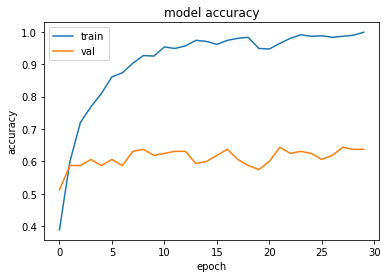

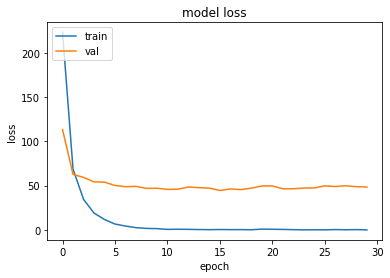

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

From the above graphs, we can understand which is the behavior of the NN algorithm implemented so far. As the two curves do not converge, it is correct to state that the model has high variance (so it is overfitting). On the other hand, the bias is low, as a consequence of the trade-off between variance and bias.

### 3.1.6 Performance criteria
The first consideration to compare these two performances indicators regards the label's distribution for the dataset under analysis. Indeed, as already mentioned in section 1.4 we have a skewed dataset. For example, there are zero actions corresponding to braking, and the predominant is the 'NO-OPeration'. This means that a criterion as the accuracy can be misinterpreted. Let's suppose that 80% of our actions were 'NO-OPeration', then if we use a dummy algorithm that for each sample predict the action 'NO-OPeration' we will still obtain an accuracy of 80%, but obviously our dummy algorithm is not performing that well. What is smart instead, is a criterion as the F1 score that performs a weighted average of the precision and recall.

Now we implement several performance criteria.

In [38]:
rf_acc = accuracy_score(ye_test, forest_clf_pred)
print("Random Forest accuracy: ", rf_acc)
mlp_acc = accuracy_score(ye_test, MLP_clf_pred)
print("MLP accuracy: ", mlp_acc)

from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(ye_test, forest_clf_pred)
print("\nRandom Forest confusion matrix: \n", rf_cm)
mlp_cm = confusion_matrix(ye_test, MLP_clf_pred)
print("MLP confusion matrix: \n", mlp_cm)

from sklearn.metrics import f1_score
rf_f1_individual = f1_score(ye_test, forest_clf_pred, average=None)
print("\nRandom Forest F1 score per label: ", rf_f1_individual)
mlp_f1_individual = f1_score(ye_test, MLP_clf_pred, average=None)
print("MLP F1 score per label: ", mlp_f1_individual)
rf_f1_weighted = f1_score(ye_test, forest_clf_pred, average='weighted')
print("\nRandom Forest weighted F1 score: ", rf_f1_weighted)
mlp_f1_weighted = f1_score(ye_test, MLP_clf_pred, average='weighted')
print("MLP weighted F1 score: ", mlp_f1_weighted)


Random Forest accuracy:  0.715
MLP accuracy:  0.595

Random Forest confusion matrix: 
 [[93  2  3  2]
 [30  6  1  0]
 [ 7  0 30  1]
 [11  0  0 14]]
MLP confusion matrix: 
 [[63 20  4 12  1]
 [15 15  2  5  0]
 [10  1 27  0  0]
 [ 8  2  1 14  0]
 [ 0  0  0  0  0]]

Random Forest F1 score per label:  [0.77178423 0.26666667 0.83333333 0.66666667]
MLP F1 score per label:  [0.64285714 0.4        0.75       0.5        0.        ]

Random Forest weighted F1 score:  0.6768921161825725
MLP weighted F1 score:  0.6004285714285714


It is possible to notice that the two classifiers have a similar performance both in terms of accuracy and FI score.

In particular, it is important to notice how both classifiers struggle with the action label 1 (Accelerate) and tend to confuse it with label 0 (Do nothing). This is because the track configuration is pretty similar for these two actions and therefore it is hard for the classifier (that indeed takes its decisions based on the track configuration) to decide what to do in these two cases (since the pilot decision is probably more based on the car speed rather than the track).

### 3.1.7 Algorithm selection
All in all, the Random Tree Classifier appears to perform slightly better than the MLP on most runs(we ran the MLP algorithm several times and only once it slightly outperformed the Random Forest), both in terms of accuracy and, most importantly, in terms of F1 score. For this reason, the Random Forest Classifier is selected for further development.

## 3.2. Fine-Tune the System
1. What are the most important hyperparameters of your chosen algorithm?
2. Perform hyperparameter optimization (including pre-processing steps)
3. Compare at least 3 models with different sets of hyperparameters 
4. Evaluate the final model (similar to “Shortlist Promising Models” above)

### 3.2.1 Most important hyperparameters
The Random Forest classifier that we chose is basically an ensemble of Decision Tree Classifiers trained with the bagging method. For this reason, the most import hyperparameters are those of a Decision Tree Classifier (max_features, max_depth, min_samples_split, min_samples_leaf, ...) together with those of a Bagging Classifier (n_estimators, bootstrap, ...).

Notice that the Decision Tree Classifier is defined as a nonparametric model, meaning that the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. This leads to a high probability of overfitting. For this reason, most of the hyperparameters that we said before (max_features, max_depth, min_samples_split, min_samples_leaf) are mostly used to regularize the classifier and avoid overfitting.

### 3.2.2 Hyperparameter optimization
Starting from the preprocessing steps, even though it is not strictly necessary for the Random Forest algorithm, scaling data is often a good idea, since it improves the distribution of the X dataset.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xe_train_scaled = scaler.fit_transform(Xe_train)
Xe_val_scaled = scaler.transform(Xe_val)
Xe_test_scaled = scaler.transform(Xe_test)

Now we can fit the Classifier on the new dataset and evaluate its prediction both on the training set and on the validation set in order to see if there is overfitting.

In [40]:
# First I define the Classifier and fit it on the train set
forest_clf = RandomForestClassifier(random_state=0)
forest_clf.fit(Xe_train_scaled, ye_train)

# Now I make predictions both on the train and the validation sets
train_pred = forest_clf.predict(Xe_train_scaled)
val_pred = forest_clf.predict(Xe_val_scaled)

# Finally I print the F1 score for both cases
f1_train_weighted = f1_score(ye_train, train_pred, average='weighted')
print("\nRandom Forest weighted F1 score for training set: ", f1_train_weighted)
f1_val_weighted = f1_score(ye_val, val_pred, average='weighted')
print("\nRandom Forest weighted F1 score for validation set: ", f1_val_weighted)


Random Forest weighted F1 score for training set:  1.0

Random Forest weighted F1 score for validation set:  0.7477633215840763


It can be clearly seen that the classifier is overfitting the training data and therefore needs regularization.a

First, we need to see what default hyperparameters have been used in the first case.

In [41]:
print(forest_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Now we can start by trying to tune the Bagging Classifier parameters for the Random Forest Classifier.

In [42]:
# First I define the Classifier and fit it on the train set
forest_clf_1 = RandomForestClassifier(random_state=0, n_estimators=200, bootstrap=True)
forest_clf_1.fit(Xe_train_scaled, ye_train)

# Now I make predictions both on the train and the validation sets
train_pred_1 = forest_clf_1.predict(Xe_train_scaled)
val_pred_1 = forest_clf_1.predict(Xe_val_scaled)

# Finally I print the F1 score for both cases
f1_train_weighted_1 = f1_score(ye_train, train_pred_1, average='weighted')
print("\nRandom Forest weighted F1 score for training set: ", f1_train_weighted_1)
f1_val_weighted_1 = f1_score(ye_val, val_pred_1, average='weighted')
print("\nRandom Forest weighted F1 score for validation set: ", f1_val_weighted_1)


Random Forest weighted F1 score for training set:  1.0

Random Forest weighted F1 score for validation set:  0.7725749480167681


We can see that the validation performance increased by roughly 3.3%, while the performance on the train test is fixed at 1.0. This means the system performs slightly better but is still overfitting.

This performance has been obtained by simply doubling the n_estimators parameter with respect to the first case. Notice that also other values were tried but did not yield performances as good as these. Also, bootstrap=False was tried but it degraded the performances with respect to boostrap=True.

The second try can be done by tuning the Decision Tree hyperparameters to try and regularize the classifier in order to reduce the overfitting.

In [43]:
# First I define the Classifier and fit it on the train set
forest_clf_2 = RandomForestClassifier(random_state=0, max_depth=11, min_samples_split=15)
forest_clf_2.fit(Xe_train_scaled, ye_train)

# Now I make predictions both on the train and the validation sets
train_pred_2 = forest_clf_2.predict(Xe_train_scaled)
val_pred_2 = forest_clf_2.predict(Xe_val_scaled)

# Finally I print the F1 score for both cases
f1_train_weighted_2 = f1_score(ye_train, train_pred_2, average='weighted')
print("\nRandom Forest weighted F1 score for training set: ", f1_train_weighted_2)
f1_val_weighted_2 = f1_score(ye_val, val_pred_2, average='weighted')
print("\nRandom Forest weighted F1 score for validation set: ", f1_val_weighted_2)


Random Forest weighted F1 score for training set:  0.9135342643476694

Random Forest weighted F1 score for validation set:  0.7870315041540066


The result this time has greatly improved with respect to the first case: not only has the performance on the train set decreased and got closer to the performance on the validation set, but also the validation performance has increased by roughly 5.2%.

This result has been achieved by decreasing the max_depth parameter, which on average reduces performances on the training set, and increasing the min_samples_split, which slightly increased to performance on the validation set. The other two hyperparameters max_features and min_sample_leaves were initially modified, but did not yield great results in this case.

A third possible attempt can be smart to exploit an algorithm that automatically tries many different configurations and chooses the best one. This kind of algorithm can work on a random based or using a grid search. The one we implemented selects the possible hyperparameters randomly from a list that we can modify. Obviously, such an algorithm requires a lot of time to be trained, but in the end, should ensure nice performances. Even if the training time will be high, the test time is similar (according to the hyperparameters selected) to the one obtained for any other RandomTree Classifier, because once the optimal parameters are found we do not have to run again the whole process.
To avoid overfitting the following algorithm implements cross-validation.


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 14, 15, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [80, 104, 128, 153, 177, 202, 226, 251, 275, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None], 'min_samples_split': [5, 10, 14, 15, 16, 20], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
# Use the random grid to search for the best hyperparameters

# Random search of parameters, using 4 fold cross validation,
# search across 150 different combinations, and use all available cores
forest_clf_3 = RandomizedSearchCV(estimator = forest_clf, param_distributions = random_grid, n_iter = 150, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_clf_3.fit(Xe_train, ye_train)

forest_clf_3.best_params_

Fitting 4 folds for each of 150 candidates, totalling 600 fits


{'n_estimators': 128,
 'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 12,
 'bootstrap': False}

In [46]:
train_pred_3 = forest_clf_3.predict(Xe_train)

val_pred_3 = forest_clf_3.predict(Xe_val)

f1_train_weighted_3 = f1_score(ye_train, train_pred_3, average='weighted')
print("\nRandom Forest weighted F1 score: on train set", f1_train_weighted_3)

f1_val_weighted_3 = f1_score(ye_val, val_pred_3, average='weighted')
print("\nRandom Forest weighted F1 score: on validation set", f1_val_weighted_3)


Random Forest weighted F1 score: on train set 0.9734097430078238

Random Forest weighted F1 score: on validation set 0.7716613746916345


Analysing the above performances we can see that the overfit is still present, but reduced if compared to the starting algorithm. Instead the perfomances are slightly improved.

###  3.2.3 Models comparison
By looking at the performances of the three models it is possible to notice how they all improved the validation set performances with respect to the default case.

The first model, however, did not solve the overfitting problem. This problem was tackled much better by the second model that managed to reduce the overfitting problem together with a higher increase in validation performances. Finally, the third method, even if it should be optimized, randomly picks only some of the trials it makes and then chooses the best among them. For this reason it seems that the one it chose still performs worse than the second model.

All in all, the second model appears to be the best one among the three and will therefore be chosen for further improvement.

### 3.2.4 Final model evaluation

In [47]:
test_pred_2 = forest_clf_2.predict(Xe_test_scaled)

acc_test_2 = accuracy_score(ye_test, test_pred_2)
print("\nRandom Forest accuracy for test set: ", acc_test_2)
cm_test_2 = confusion_matrix(ye_test, test_pred_2)
print("\nRandom Forest confusion matrix for test set: \n", cm_test_2)
f1_test_individual_2 = f1_score(ye_test, test_pred_2, average=None)
print("\nRandom Forest F1 score per label for test set: ", f1_test_individual_2)
f1_test_weighted_2 = f1_score(ye_test, test_pred_2, average='weighted')
print("\nRandom Forest weighted F1 score for test set: ", f1_test_weighted_2)


Random Forest accuracy for test set:  0.725

Random Forest confusion matrix for test set: 
 [[95  0  3  2]
 [31  6  0  0]
 [ 9  0 29  0]
 [10  0  0 15]]

Random Forest F1 score per label for test set:  [0.7755102  0.27906977 0.82857143 0.71428571]

Random Forest weighted F1 score for test set:  0.6860972947318463


By evaluating the model on the test set we can see some slight improvements with respect to the first case.

First of all the accuracy has increased by 1.4%, which is not really impressive but is still an improvement. Also the F1 score has increased by 1.4% which is a more important improvement since this parameter is more relevant with respect to the accuracy. Notice that also the F1 score for label 1 has slightly increased.

Now we can try this classifier on an Earth track to see how it performs.

In [48]:
def f_3_1 (observation):
    
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca.transform(obs_fs)
    action = forest_clf_2.predict(obs_reduced)
    return action[0]

# running the simulation with the dummy policy
rs = run_simulation(f_3_1, render=1, planet_id=0, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 29 iterations: 5.745533141210385
average reward: 0.1981218324555305


As can be seen from this simulation, the classifier recognizes well the borders of the circuit, but its F1 score of 0.28 for label 1 prevents the car to accelerate and therefore the performance is very poor in terms of speed.

### 3.2.5 Random Forest with undersampling
A technique we can try to implement to improve the performances is the undersampling of the action 'Do-Nothing'. A manual algorithm for undersampling is implemented below.

In [49]:
# Let's save again the date available 
Xe_initial = X[planet_ids == 0]
ye_initial = y[planet_ids == 0]

# Now, we subdivide data and labels according to the label
X_0 = Xe_initial[ye_initial == 0]
y_0 = ye_initial[ye_initial == 0]

X_1 = Xe_initial[ye_initial == 1]
y_1 = ye_initial[ye_initial == 1]

X_2 = Xe_initial[ye_initial == 2]
y_2 = ye_initial[ye_initial == 2]

X_3 = Xe_initial[ye_initial == 3]
y_3 = ye_initial[ye_initial == 3]

# We generate an array called 'filtering' that through the boolen indexes will select
# only part of the data labelled as 'Do-Nothing'. The number of 'ones' and 'zeros' has
# been chosen to obtain a balances number of sample labelled as 'Do-Nothing' and 'Accelerate'
ones = np.ones(313)
zeros = np.zeros(190)
filtering = np.concatenate((ones, zeros), axis=None)


from sklearn.utils import shuffle
# Shuffle of the data labelled as 'Do-Nothing' to be sure to select from there random samples
shuffled_X0, shuffled_y0 = shuffle(X_0, y_0, random_state=0)
X_0_undersample = shuffled_X0[filtering == 0]
y_0_undersample = shuffled_y0[filtering == 0]


print("The number of sample where the car accelerate are", X_1.shape[0])
print("The number of sample where the car does nothing are", X_0_undersample.shape[0])

# The full data set is recomposed
Xe_0 = np.concatenate((X_0_undersample, X_1, X_2, X_3), axis=0)
ye_0 = np.concatenate((y_0_undersample, y_1, y_2, y_3), axis=0)

# From now on we just implement the same step as before
shuffled_Xe_0, shuffled_ye_0 = shuffle(Xe_0, ye_0, random_state=0)


from sklearn.model_selection import train_test_split
Xe_train_0, Xe_test_0, ye_train_0, ye_test_0 = train_test_split(shuffled_Xe_0, shuffled_ye_0, test_size=0.20, random_state=0)
Xe_train_0, Xe_val_0, ye_train_0, ye_val_0 = train_test_split(Xe_train_0, ye_train_0, test_size=0.20, random_state=0)

The number of sample where the car accelerate are 190
The number of sample where the car does nothing are 190


Now, we can implement again the best RandomForest previously found.

In [50]:
Xe_train_scaled_0 = scaler.fit_transform(Xe_train_0)
Xe_val_scaled_0 = scaler.transform(Xe_val_0)
Xe_test_scaled_0 = scaler.transform(Xe_test_0)

# First I define the Classifier and fit it on the train set
forest_clf_2_0 = RandomForestClassifier(random_state=0, max_depth=11, min_samples_split=15)
forest_clf_2_0.fit(Xe_train_scaled_0, ye_train_0)

# Now I make predictions both on the train and the validation sets
train_pred_2_0 = forest_clf_2_0.predict(Xe_train_scaled_0)
val_pred_2_0 = forest_clf_2_0.predict(Xe_val_scaled_0)

# Finally I print the F1 score for both cases
f1_train_weighted_2_0 = f1_score(ye_train_0, train_pred_2_0, average='weighted')
print("\nRandom Forest weighted F1 score for training set: ", f1_train_weighted_2_0)
f1_val_weighted_2_0 = f1_score(ye_val_0, val_pred_2_0, average='weighted')
print("\nRandom Forest weighted F1 score for validation set: ", f1_val_weighted_2_0)


Random Forest weighted F1 score for training set:  0.9863253444206846

Random Forest weighted F1 score for validation set:  0.6517653399232347


Actually, the performances on the validation test are not encouraging, but let's see how it performs on the test dataset:

In [51]:
test_pred_2_0 = forest_clf_2_0.predict(Xe_test_scaled_0)

acc_test_2_0 = accuracy_score(ye_test_0, test_pred_2_0)
print("\nRandom Forest accuracy for test set: ", acc_test_2_0)
cm_test_2_0 = confusion_matrix(ye_test_0, test_pred_2_0)
print("\nRandom Forest confusion matrix for test set: \n", cm_test_2_0)
f1_test_individual_2_0 = f1_score(ye_test_0, test_pred_2_0, average=None)
print("\nRandom Forest F1 score per label for test set: ", f1_test_individual_2_0)
f1_test_weighted_2_0 = f1_score(ye_test_0, test_pred_2_0, average='weighted')
print("\nRandom Forest weighted F1 score for test set: ", f1_test_weighted_2_0)


Random Forest accuracy for test set:  0.717391304347826

Random Forest confusion matrix for test set: 
 [[21 12  6  0]
 [ 8 27  2  1]
 [ 3  0 41  0]
 [ 4  2  1 10]]

Random Forest F1 score per label for test set:  [0.56       0.6835443  0.87234043 0.71428571]

Random Forest weighted F1 score for test set:  0.7126124594968493


In this case seems that the improvement regarding the performances is great. Not only the F1 score is higher, but the misclassification of the accelerations has been drastically reduced. One more step is needed though, the simulation:

In [52]:
def f_3_0 (observation):
    
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca.transform(obs_fs)
    action = forest_clf_2_0.predict(obs_reduced)
    return action[0]

rs = run_simulation(f_3_0, render=1, planet_id=0, track_id=3)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1103..1381 -> 278-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 23 iterations: 8.5303249097473
average reward: 0.37088369172814345


Unfortunately, the actual performances are still unsatisfying because the car still does not accelerate correctly.

### 3.2.6 Neural network re-evaluation
Even if in section 3.2 we decided to develop the RandomForest, let's give a chance to the Neural Network (without any tuning) to see if can perform better.

In [53]:
def f_3_2 (observation):
    
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca.transform(obs_fs)
    action = np.argmax(model.predict(obs_reduced), axis=1)
    return action[0]

rs = run_simulation(f_3_2, render=1, planet_id=0, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 12 iterations: 7.445533141210379
average reward: 0.6204610951008649


Yes, the Neural Network, even if not tuned, is performing very well! Unfortunately, now we do not have the time to repeat all the steps above for the Neural Network, but the smartest idea is to keep using it as it is way better than the tuned Random Forest.
A little tuning process of the Neural Network is done here below.

First, we want to see the evaluation of the model before tuning hyperparameters.

In [54]:
MLP_clf_pred = np.argmax(model.predict(Xe_val), axis=1)
                            #
mlp_acc = accuracy_score(ye_val, MLP_clf_pred)
print("MLP accuracy: ", mlp_acc)
                            #
mlp_cm = confusion_matrix(ye_val, MLP_clf_pred)
print("MLP confusion matrix: \n", mlp_cm)
                                #
mlp_f1_individual = f1_score(ye_val, MLP_clf_pred, average=None)
print("MLP F1 score per label: ", mlp_f1_individual)
                            #
mlp_f1_weighted = f1_score(ye_val, MLP_clf_pred, average='weighted')
print("MLP weighted F1 score: ", mlp_f1_weighted)

MLP accuracy:  0.6375
MLP confusion matrix: 
 [[63 19  7  5]
 [13 13  1  0]
 [ 5  0 17  0]
 [ 7  1  0  9]]
MLP F1 score per label:  [0.69230769 0.43333333 0.72340426 0.58064516]
MLP weighted F1 score:  0.641017402724249


Now instead we try and implement an early stopping and increase the number of neurons of the hidden layer.

In [55]:
model_tuned = keras.models.Sequential()
model_tuned.add(keras.layers.Input([130]))
model_tuned.add(keras.layers.Dense(105, activation="relu"))
model_tuned.add(keras.layers.Dense(5, activation="softmax"))
model_tuned.summary()

model_tuned.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Implementing early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model_tuned.fit(Xe_train, ye_train, epochs=100, validation_data=(Xe_val, ye_val), callbacks=[checkpoint_cb, early_stopping_cb]);

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 105)               13755     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 530       
Total params: 14,285
Trainable params: 14,285
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 196.1464 - accuracy: 0.3364 - val_loss: 76.5649 - val_accuracy: 0.5625
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 62.5275 - accuracy: 0.6412 - val_loss: 60.2200 - val_accuracy: 0.6687
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 30.5176 - accuracy: 0.7651 - val_loss: 58.5735 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 20.0550 -

In [56]:
MLP_tuned_clf_pred = np.argmax(model_tuned.predict(Xe_val), axis=1)
                           
mlp_tuned_acc = accuracy_score(ye_val, MLP_tuned_clf_pred)
print("MLP accuracy: ", mlp_tuned_acc)
                           
mlp_tuned_cm = confusion_matrix(ye_val, MLP_tuned_clf_pred)
print("MLP confusion matrix: \n", mlp_tuned_cm)
                             
mlp_tuned_f1_individual = f1_score(ye_val, MLP_tuned_clf_pred, average=None)
print("MLP F1 score per label: ", mlp_tuned_f1_individual)
                           
mlp_tuned_f1_weighted = f1_score(ye_val, MLP_tuned_clf_pred, average='weighted')
print("MLP weighted F1 score: ", mlp_tuned_f1_weighted)

MLP accuracy:  0.65
MLP confusion matrix: 
 [[61 23  5  4  1]
 [11 14  0  2  0]
 [ 3  0 19  0  0]
 [ 6  0  1 10  0]
 [ 0  0  0  0  0]]
MLP F1 score per label:  [0.69714286 0.4375     0.80851064 0.60606061 0.        ]
MLP weighted F1 score:  0.6589637057313255


(Notice that the above performances could slightly change at each simulation).

We implemented an early stopping algorithm to avoid overfitting and we modified the number of neurons from 100 to 105. Moreover, the training data used are still the ones undersampled to have the label 0 and label 1 more balanced.

We can see that now the performances have slightly increased on the validation set and the computation time has been reduced. 

We can now run a final simulation.

In [57]:
def f_3_tuned (observation):
    
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca.transform(obs_fs)
    action = np.argmax(model_tuned.predict(obs_reduced), axis=1)
    return action[0]

rs = run_simulation(f_3_tuned, render=1, planet_id=2, track_id=1)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1323..1655 -> 332-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 12 iterations: 7.863444108761334
average reward: 0.6552870090634445


The simulation is definetely satisfactory and therefore we can proceed with this classifier.

---

# 4. Enabling Generalization (20 points)
Now we are going to train and test a single model that is suitable for racing on all planets, i.e., a model that can generalize between planets and even to unseen planets, and that is robust to different colors of the background terrain. The idea is to take the final model you developed above as a starting point and to further develop it further for generalization.

The simulator provides you access to Neptune. However, this is to be treated as the test set, i.e., you are only allowed to test your model on it as the very final step. I.e., do not tweak your model after running that environment, you would be overfitting to the test data. Performance on the Neptune environment will NOT influence your grade.

1. How can the 3 provided datasets be used to train a model that can generalize, and even more importantly how can they be used to evaluate whether a model can generalize? (Hint: Lecture 2)
2. Above you designed features for action classification, evaluate whether that feature is indeed suitable for generalization. If necessary adapt the feature extraction.
3. Compare how well models trained just on the data from Earth and models trained on data of multiple planets generalize to unseen planets (using the approach from the first bullet, do *not* use Neptune for this comparison). Make sure that this is a fair comparison, e.g., in terms of the amount and quality of the data.
4. Discuss at least 2 methods that can be employed to make your model perform better and be robust to the variations we have in this scenario (methods for any step are fine: data collection, data augmentation, pre-processing, model structure, training, etc.)
5. Implement at least one of those methods.
6. Evaluate the final model (similar to “Shortlist Promising Models” above) for generalization making use only of data from Earth, Mars, and Saturn.
7. Test the final model on the Neptune environment and discuss its performance.
8. Save the parameters of your best multi scenario model to your hard drive (use pickle for sklearn or built-in save/load for keras), you will need to be able to reload your model without training in the next step. Be sure to include the saved parameters in your zip file so we can evaluate your best model too, even without rerunning the notebook up to here.

## 4.1 How to generalize
Up to now, both the training and the validation were done on the earth dataset. For this reason, the classifier we have now tuned is very used to the green color of the earth tracks and therefore might not perform well on the two other planets (generalize).

To try its performance we now train the classifier on the whole Earth dataset and try and validate it on the Mars and Saturn dataset.

In [58]:
obs_fs_list = []
for i in range(observations.shape[0]):
    fs = np.ndarray.flatten(observations[i])
    obs_fs_list.append(fs)
obs_fs = np.array(obs_fs_list)
    
obs_reduced = feat_extract(obs_fs)

shuffled_obs, shuffled_act = shuffle(obs_reduced, actions, random_state=0)

X_train_gen = shuffled_obs[planet_ids == 0]
y_train_gen = shuffled_act[planet_ids == 0]
X_val_gen = shuffled_obs[planet_ids > 0]
y_val_gen = shuffled_act[planet_ids > 0]

model_tuned.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned.predict(X_val_gen), axis=1)

acc_val_gen = accuracy_score(y_val_gen, val_pred)
print("\nGeneralized accuracy for validation set: ", acc_val_gen)
cm_val_gen = confusion_matrix(y_val_gen, val_pred)
print("\nGeneralized confusion matrix for validation set: \n", cm_val_gen)
f1_individual_val_gen = f1_score(y_val_gen, val_pred, average=None)
print("\nGeneralized F1 score per label for validation set: ", f1_individual_val_gen)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nGeneralized weighted F1 score for validation set: ", f1_weighted_val_gen)

Epoch 1/100
25/25 [==============================] - 0s 8ms/step - loss: 57.6181 - accuracy: 0.7025 - val_loss: 41.2174 - val_accuracy: 0.7150
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 21.6922 - accuracy: 0.7775 - val_loss: 34.7748 - val_accuracy: 0.7600
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 12.9263 - accuracy: 0.8562 - val_loss: 33.7234 - val_accuracy: 0.7900
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 7.0041 - accuracy: 0.8813 - val_loss: 36.0801 - val_accuracy: 0.7400
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 6.1984 - accuracy: 0.8875 - val_loss: 33.3928 - val_accuracy: 0.7550
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 3.8094 - accuracy: 0.9225 - val_loss: 35.2745 - val_accuracy: 0.7450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 4.2414 - accuracy: 0.9200 - val_loss: 34.6181 - val_accuracy: 0.7300
Epo

In [59]:
rs = run_simulation(f_3_tuned, render=1, planet_id=2, track_id=1)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1323..1655 -> 332-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 12 iterations: 7.863444108761334
average reward: 0.6552870090634445


We can see that, as expected, the performance is much worse when trying to generalize to other planets (especially for the simulation). In fact, many more labels get misclassified as do nothing.

## 4.2 Feature extraction adaptation

It's easy to imagine that the main problem for the generalization is the color of the tracks. For this reason, an idea to improve the feature extraction may be turning all images from RGB to grayscale. This could reduce the difference in the track background and therefore help the classifier generalize to other planets.

First, we want to understand if grayscale pictures can be used.

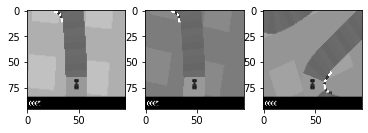

In [60]:
from skimage.color import rgb2gray
gray0 = rgb2gray(obs_p0[0])
gray1 = rgb2gray(obs_p1[0])
gray2 = rgb2gray(obs_p2[0])

plt.subplot(1,3,1)
plt.imshow(gray0, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(gray1, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(gray2, cmap=plt.cm.gray)

As we can see now the background of the three planets is much more unified, with the street still being visible in all three cases (the worst one being Mars).

Now we want to redefine the feat_extract function in order to still keep 130 features.

In [61]:
def feat_extract_2(obs_fs):
    pca = PCA(n_components = 130)
    obs_reduced = pca.fit_transform(obs_fs)
    return obs_reduced;

Now we can add this change to the dataset and try to see the performances again.

In [62]:
obs_gray = rgb2gray(observations)

obs_fs_list = []
for i in range(obs_gray.shape[0]):
    fs = np.ndarray.flatten(obs_gray[i])
    obs_fs_list.append(fs)
obs_fs = np.array(obs_fs_list)
    
obs_reduced = feat_extract_2(obs_fs)

shuffled_obs, shuffled_act = shuffle(obs_reduced, actions, random_state=0)

X_train_gen = shuffled_obs[planet_ids == 0]
y_train_gen = shuffled_act[planet_ids == 0]
X_val_gen = shuffled_obs[planet_ids > 0]
y_val_gen = shuffled_act[planet_ids > 0]

model_tuned.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned.predict(X_val_gen), axis=1)

acc_val_gen = accuracy_score(y_val_gen, val_pred)
print("\nGeneralized accuracy for validation set: ", acc_val_gen)
cm_val_gen = confusion_matrix(y_val_gen, val_pred)
print("\nGeneralized confusion matrix for validation set: \n", cm_val_gen)
f1_individual_val_gen = f1_score(y_val_gen, val_pred, average=None)
print("\nGeneralized F1 score per label for validation set: ", f1_individual_val_gen)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nGeneralized weighted F1 score for validation set: ", f1_weighted_val_gen)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 1.2463 - accuracy: 0.4550 - val_loss: 1.2342 - val_accuracy: 0.4750
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1958 - accuracy: 0.4888 - val_loss: 1.1962 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1640 - accuracy: 0.5188 - val_loss: 1.1700 - val_accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1399 - accuracy: 0.5337 - val_loss: 1.1499 - val_accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1212 - accuracy: 0.5387 - val_loss: 1.1331 - val_accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1052 - accuracy: 0.5512 - val_loss: 1.1175 - val_accuracy: 0.5300
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.0902 - accuracy: 0.5537 - val_loss: 1.1035 - val_accuracy: 0.5300
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.6700 - val_loss: 0.8173 - val_accuracy: 0.6600
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7880 - accuracy: 0.6700 - val_loss: 0.8151 - val_accuracy: 0.6650
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.6700 - val_loss: 0.8123 - val_accuracy: 0.6700
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7824 - accuracy: 0.6712 - val_loss: 0.8098 - val_accuracy: 0.6700
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7794 - accuracy: 0.6712 - val_loss: 0.8072 - val_accuracy: 0.6700
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7765 - accuracy: 0.6712 - val_loss: 0.8048 - val_accuracy: 0.6750
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7739 - accuracy: 0.6700 - val_loss: 0.8027 - val_accuracy: 0.6750
Epoch 

Unfortunately, the performances do not improve significantly with respect to when we were working with RGB images, so this technique is not really useful.

## 4.3 Training comparison
As we said, the previous classifier was only trained on Earth and validated on Mars and Saturn. Now we want to try and train on two different plants to see if the performance improves. Therefore we will take Earth and Mars as train datasets and only Saturn as validation set. Notice that, to make the comparison fair, we need to take out 200 samples from the Earth dataset in order to "make space" for the 200 samples from Mars and have once again 1000 samples for the training set.

In [63]:
observations_reduced = observations[200:]
actions_reduced = actions[200:]
planet_ids_reduced = planet_ids[200:]

obs_fs_list = []
for i in range(observations_reduced.shape[0]):
    fs = np.ndarray.flatten(observations_reduced[i])
    obs_fs_list.append(fs)
obs_fs = np.array(obs_fs_list)
    
obs_reduced = feat_extract_2(obs_fs)

shuffled_obs, shuffled_act = shuffle(obs_reduced, actions_reduced, random_state=0)

X_train_gen = shuffled_obs[planet_ids_reduced < 2]
y_train_gen = shuffled_act[planet_ids_reduced < 2]
X_val_gen = shuffled_obs[planet_ids_reduced == 2]
y_val_gen = shuffled_act[planet_ids_reduced == 2]

model_tuned.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned.predict(X_val_gen), axis=1)

acc_val_gen = accuracy_score(y_val_gen, val_pred)
print("\nGeneralized accuracy for validation set: ", acc_val_gen)
cm_val_gen = confusion_matrix(y_val_gen, val_pred)
print("\nGeneralized confusion matrix for validation set: \n", cm_val_gen)
f1_individual_val_gen = f1_score(y_val_gen, val_pred, average=None)
print("\nGeneralized F1 score per label for validation set: ", f1_individual_val_gen)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nGeneralized weighted F1 score for validation set: ", f1_weighted_val_gen)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 103.8888 - accuracy: 0.6000 - val_loss: 91.1693 - val_accuracy: 0.6550
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 49.2925 - accuracy: 0.7538 - val_loss: 81.8498 - val_accuracy: 0.6350
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 29.2267 - accuracy: 0.8062 - val_loss: 69.6513 - val_accuracy: 0.6800
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 14.2387 - accuracy: 0.8587 - val_loss: 51.9078 - val_accuracy: 0.6700
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 8.5248 - accuracy: 0.8900 - val_loss: 51.9223 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 5.5957 - accuracy: 0.9000 - val_loss: 50.4275 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5426 - accuracy: 0.9275 - val_loss: 50.9592 - val_accuracy: 0.6650
E

In [64]:
rs = run_simulation(f_3_tuned, render=1, planet_id=2, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1262..1568 -> 306-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 33 iterations: 13.093442622950832
average reward: 0.3967709885742676


Even though the F1 score doesn't seem to improve so much, by running the simulation we can see how the classifier now generalizes better on other planets.

## 4.4 Improvement methods
In section 1 we noticed how the dataset is unbalanced in terms of planets: we have 1000 samples from Earth, 200 from Mars and 200 from Saturn. This obviously makes the classifier get more used to Earth when training and therefore has some difficulties generalizing. A way to take care of this problem would be recording more samples from Mars and Saturn so that the classifier can adapt more to changes in colors and therefore be more flexible when dealing with new planets.

Another improvement that can be applied would be trying to reduce the features of the dataset. It does sound counterintuitive, but maybe with this operation the importance of colors in the training of the classifier would be less and therefore it could generalize better on the different planets.

## 4.5 Applying the improvement

We will now try and implement the second approach we talked about in the previous section.

We now need to create another function for feature extraction.

In [65]:
def feat_extract_3(obs_fs):
    pca_80 = PCA(n_components = 80)
    obs_reduced = pca_80.fit_transform(obs_fs)
    return obs_reduced;

We tried reducing the final features from 130 to 80.

Now we want to test the results using both extractors.

In [66]:
obs_reduced = feat_extract_2(obs_fs)
shuffled_obs, shuffled_act = shuffle(obs_reduced, actions_reduced, random_state=0)
X_train_gen = shuffled_obs[planet_ids_reduced < 2]
y_train_gen = shuffled_act[planet_ids_reduced < 2]
X_val_gen = shuffled_obs[planet_ids_reduced == 2]
y_val_gen = shuffled_act[planet_ids_reduced == 2]
model_tuned.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned.predict(X_val_gen), axis=1)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nWeighted F1 score for validation set with 130 features: ", f1_weighted_val_gen)

rs = run_simulation(f_3_tuned, render=1, planet_id=1, track_id=1)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 22.1880 - accuracy: 0.7812 - val_loss: 71.1528 - val_accuracy: 0.6050
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 11.2558 - accuracy: 0.8500 - val_loss: 69.3926 - val_accuracy: 0.6300
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 5.7361 - accuracy: 0.9062 - val_loss: 64.9438 - val_accuracy: 0.6550
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 3.1309 - accuracy: 0.9250 - val_loss: 63.7507 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 5.1603 - accuracy: 0.9087 - val_loss: 66.5243 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 3.5853 - accuracy: 0.9300 - val_loss: 67.6511 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2044 - accuracy: 0.9600 - val_loss: 62.3459 - val_accuracy: 0.6850
Epoc

C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 34 iterations: 14.650541516245498
average reward: 0.43089827988957347


In [67]:
model_tuned_80 = keras.models.Sequential()
model_tuned_80.add(keras.layers.Input([80]))
model_tuned_80.add(keras.layers.Dense(105, activation="relu"))
model_tuned_80.add(keras.layers.Dense(5, activation="softmax"))
model_tuned_80.summary()
model_tuned_80.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Implementing early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

obs_reduced = feat_extract_3(obs_fs)
shuffled_obs, shuffled_act = shuffle(obs_reduced, actions_reduced, random_state=0)
X_train_gen = shuffled_obs[planet_ids_reduced < 2]
y_train_gen = shuffled_act[planet_ids_reduced < 2]
X_val_gen = shuffled_obs[planet_ids_reduced == 2]
y_val_gen = shuffled_act[planet_ids_reduced == 2]
model_tuned_80.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned_80.predict(X_val_gen), axis=1)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nWeighted F1 score for validation set with 100 features: ", f1_weighted_val_gen)

pca_80 = PCA(n_components = 80)
pca_80.fit(obs_fs)
def f_3_tuned_80 (observation):
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca_80.transform(obs_fs)
    action = np.argmax(model_tuned_80.predict(obs_reduced), axis=1)
    return action[0]
rs = run_simulation(f_3_tuned_80, render=1, planet_id=1, track_id=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 105)               8505      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 530       
Total params: 9,035
Trainable params: 9,035
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 496.1854 - accuracy: 0.2188 - val_loss: 157.5334 - val_accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 125.6907 - accuracy: 0.5749 - val_loss: 94.4527 - val_accuracy: 0.5800
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 68.9218 - accuracy: 0.6262 - val_loss: 74.2778 - val_accuracy: 0.6450
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 46.7337 

C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 9 iterations: 6.320216606498198
average reward: 0.7022462896109108


Even though from the F1 score we do not see many improvements, by running the simulation we notice how the performance appears to be overall slightly better. Moreover, we now have slightly better performances together with a reduced amount of features that should additionally decrease the computation time.

## 4.6 Final evaluation of the classifier

Now we can finally do the final evaluation of the classifier by both training and testing on all of the three planets.

First we recreate a train and test set.

In [68]:
obs_fs_list = []
for i in range(observations.shape[0]):
    fs = np.ndarray.flatten(observations[i])
    obs_fs_list.append(fs)
obs_fs = np.array(obs_fs_list)
    
obs_reduced = feat_extract_3(obs_fs)

shuffled_obs, shuffled_act = shuffle(obs_reduced, actions, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(shuffled_obs, shuffled_act, test_size=0.20, random_state=0)

model_tuned_80.fit(X_train_gen, y_train_gen, epochs=100, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb]);
val_pred = np.argmax(model_tuned_80.predict(X_val_gen), axis=1)

acc_val_gen = accuracy_score(y_val_gen, val_pred)
print("\nGeneralized accuracy for validation set: ", acc_val_gen)
cm_val_gen = confusion_matrix(y_val_gen, val_pred)
print("\nGeneralized confusion matrix for validation set: \n", cm_val_gen)
f1_individual_val_gen = f1_score(y_val_gen, val_pred, average=None)
print("\nGeneralized F1 score per label for validation set: ", f1_individual_val_gen)
f1_weighted_val_gen = f1_score(y_val_gen, val_pred, average='weighted')
print("\nGeneralized weighted F1 score for validation set: ", f1_weighted_val_gen)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 1.2645 - accuracy: 0.9538 - val_loss: 54.7140 - val_accuracy: 0.6150
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5088 - accuracy: 0.9438 - val_loss: 54.5632 - val_accuracy: 0.6550
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 4.6744 - accuracy: 0.9100 - val_loss: 55.6172 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6841 - accuracy: 0.9312 - val_loss: 51.2879 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4929 - accuracy: 0.9538 - val_loss: 51.5436 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3721 - accuracy: 0.9525 - val_loss: 51.8761 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0490 - accuracy: 0.9300 - val_loss: 56.4378 - val_accuracy: 0.6150
Epoch 

In [69]:
rs = run_simulation(f_3_tuned_80, render=1, planet_id=0, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1383..1731 -> 348-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 98 iterations: 42.07319884726219
average reward: 0.4293183555843081


In [70]:
rs = run_simulation(f_3_tuned_80, render=1, planet_id=1, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1156..1463 -> 307-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 11 iterations: 8.703921568627456
average reward: 0.7912655971479505


In [71]:
rs = run_simulation(f_3_tuned_80, render=1, planet_id=2, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1262..1568 -> 306-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 8 iterations: 5.757377049180331
average reward: 0.7196721311475414


We can see how once again the F1 score is not great, but when we compare the simulation performance with the previous ones an improvement can be clealy seen: now the algorithm performs fairly well on all of the three planets.

## 4.7 Race on Neptune
Now we are finally ready for the final race on Neptune. We now just run the simulation on the fourth planet.

In [72]:
rs = run_simulation(f_3_tuned_80, render=1, planet_id=3, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1376..1698 -> 322-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1037..1302 -> 265-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 6 iterations: 6.975757575757578
average reward: 1.1626262626262631


Unfortunately, the simulation does not show the expected results, even though it generalized pretty well when we tried the validation on Saturn.

The reason is probably that the color of Saturn (brownish) was closer to the color of Earth. Neptune's color is instead much more different than the others and this may be the reason why the classifier performs so badly on those tracks.

### 4.7.1 Possible different approach
In order to try and solve the problem of Neptune, but ideally also of other planets, we thought of a possible different approach.

Since it would be realistically easier to gather data on Earth rather than other planets, a possible approach would be only training on Earth data and then converting all the input images from other planets to Earth's color. In fact, in this simulation, the only difference among planets was the color of the background, while instead the color and shape of the road were always the same. For this reason, it would be possible, using a fairly simple algorithm, to filter the color of the road (imposing a range that includes its RGB values) and convert all the other colors to green. In this way, the data fed to the predict function of the classifier would always be similar to the data it was trained with.

Unfortunately, implementing this technique would have deviated from this assignment's purpose and now we don't really have time to implement it, but we wanted to share this idea we had.

## 4.8 Saving the parameters
We can now save the parameters of our final best model in a directory called 'best_model'.

model_tuned_80.save('best_model')

---

# 5. Present Your Solution (5 points)
1. Summarize your main decisions and insights
2. Create a stand-alone demo. I.e., a block of cells that can be run on its own. For that you will need to load your pre-trained best model you saved in the previous section and run it on a Neptune track.


## 5.1 Summary
To tackle the problem of making our car race on Neptune we adopted several steps.

First of all, we visualized the data, trying to analyze several features and characteristics such as the dataset being skewed both towards planets and actions. We also the samples are not initially i.i.d and that human collected data have some limitations.

Then we tried clustering the data in order to divide them according to the planet they belonged to. We obtained excellent results using a simple K-Means algorithm. Then we implemented our first feature extractor method using a PCA that greatly reduced the initially huge amount of features by preserving 90% of the variance.

Then, we needed to compare two algorithms. The choice we made was a Random Forest Classifier and an MLP built with a Sequential API. First, we considered the advantages and disadvantages of both classifiers, then we initialized them with random values and made a quick evaluation on the test set. Since the Random Forest slightly outperformed the neural network in terms of the F1 score, we proceeded with that one. Then we discussed the possible parameters to be tuned and tried three different approaches. The one resulting with best performances was the case that involved modifying the hyperparameters related to the Decision Tree structure. All these considerations were made based on the F1 score. However, when we tried to run the simulation using the Random Forest Classifier, the performances were really poor if compared to the untuned MLP. Therefore we changed our mind and opted for the neural network. We then applied a brief hyperparameter tuning in order to obtain a regularization with early stopping and slightly better performances for the F1 score.

After that, we approached the generalization problem by first training the classifier on the whole Earth dataset and validating it on the Mars and Saturn datasets. As expected the results were poor. Then we tried a slightly different procedure for the feature extraction by turning the images from RGB to grayscale in order to unify the colors. Unfortunately, this procedure did not produce good results and was therefore abandoned. After that, we compared the results from training the classifier only on Earth to training it both on Earth and Mars. This second attempt yielded much better results in terms of simulation performance when trying to run on Saturn. Then we thought of two possible improvements that could be applied to our solution in order to improve the overall performance: getting more data from Mars and Saturn and reducing the number of features. We applied the latter that, even if counter-intuitively, slightly improved the performance since it would probably give less importance to the colors of the images. Then we ran a final evaluation using data from all three planets both as train and test sets and got pretty good performances on all the planets. Finally, we ran the final simulation on Neptune, where unfortunately our algorithm did not perform particularly well. As the last point, we suggested a possible different approach to face this problem.

## 5.2 Stand-alone demo
This is the stand-alone demo that can be run aftur running section 0.

In [73]:
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras

# Code to flatten and then train the PCA algorithm used to reduce dimensionality of the data
obs_fs_list = []
for i in range(observations.shape[0]):
    fs = np.ndarray.flatten(observations[i])
    obs_fs_list.append(fs)
pca_80 = PCA(n_components = 80)
pca_80.fit(obs_fs)

# Import the best model
model_upload = keras.models.load_model('best_model')

# Define the policy for the simulation
def f_3_tuned_80 (observation):
    obs_fs1 = np.ndarray.flatten(observation)
    obs_fs = obs_fs1.reshape(1, -1)
    obs_reduced = pca_80.transform(obs_fs)
    action = np.argmax(model_upload.predict(obs_reduced), axis=1)
    return action[0]

rs = run_simulation(f_3_tuned_80, render=1, planet_id=2, track_id=0)

Starting simulation for 500 iterations.
*** Press ESC key in popup window to stop the simulation! ***

Track generation: 1262..1568 -> 306-tiles track


C:\Users\gioel\anaconda3\envs\tf2\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


total reward after 16 iterations: 8.236065573770498
average reward: 0.5147540983606561


For some reason this final demo is not showing the same results as the simulations above. We tried fixing this problem, but we were not able to. Sorry for the inconvenience.